Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       151
         1.0       0.49      0.50      0.49       149

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Akurasi pada Algoritma Decision Tree dengan persentase 70:30 = 48.0
Akurasi pada Algoritma KNeighbors dengan persentase 70:30 = 53.666666666666664


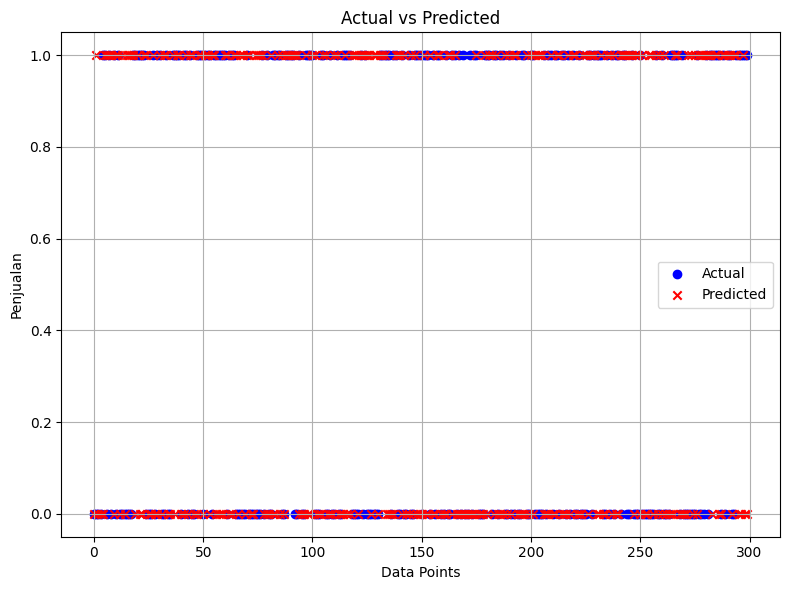

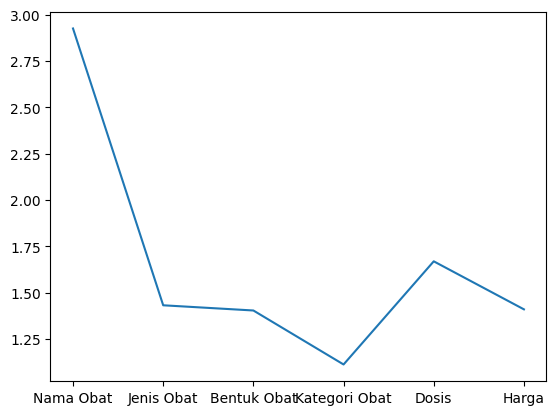

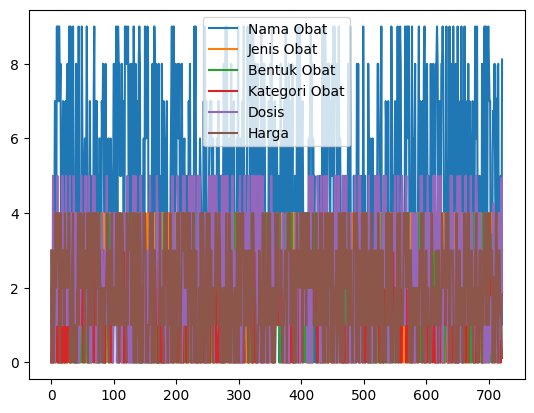

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from io import StringIO 
from IPython.display import Image
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

# Membaca dataset
data_source = 'dataset_apotik.csv'
df = pd.read_csv(data_source, delimiter=";")

# Preprocessing
# Mengisi nilai yang hilang dengan 0
new_df = df.fillna(0)
cols = df.columns

# Inisialisasi SMOTE
smote = SMOTE(k_neighbors=4)

# Menggunakan encoder ordinal
x_binary = OrdinalEncoder()
x_binary_df = x_binary.fit_transform(new_df)

# Mengembalikan ke DataFrame dengan nama kolom yang sama
x_binary_df= pd.DataFrame(x_binary_df, columns=new_df.columns)


# Menghilangkan kolom yang tidak diperlukan
x_source = x_binary_df .drop(["ID Obat", "Tanggal Expired", "Penjualan", "Jumlah Stok", "Permintaan Bulanan", "Waktu Reorder (hari)","Jumlah Reorder"],axis=1)
y_source = x_binary_df ['Penjualan']


# Memisahkan data menjadi train dan test set
x_train, x_test, y_train, y_test = train_test_split(x_source, y_source, test_size=0.3, random_state=0)

# Melakukan oversampling terhadap data training
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Inisialisasi Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Melatih model Decision Tree Classifier dengan data oversampled
dt_classifier.fit(x_train_smote, y_train_smote)

# Memprediksi nilai target pada data test
y_pred = dt_classifier.predict(x_test)

# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Fit the Decision Tree model
modelDT = DecisionTreeClassifier().fit(x_train, np.ravel(y_train, order='C'))
predictionDT = modelDT.predict(x_test)

# Fit the KNeighbors Tree model
modelKN = KNeighborsClassifier().fit(x_train,np.ravel(y_train,order='C'))
predictionKN = modelKN.predict(x_test)

# Calculate and print the accuracy
accuracies = accuracy_score(y_test, predictionDT) * 100
print('Akurasi pada Algoritma Decision Tree dengan persentase 70:30 = %s' % accuracies)

# Calculate and print the accuracy
accuracies = accuracy_score(y_test, predictionKN) * 100
print('Akurasi pada Algoritma KNeighbors dengan persentase 70:30 = %s' % accuracies)

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))

# Scatter plot untuk data aktual
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Scatter plot untuk hasil prediksi
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Penjualan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

x_train_smote.std().plot()
x_train_smote.plot()
x_train_smote.value_counts()

# Save the model to a file decision tree
filename = './DT_apotik.pkl'
pickle.dump(modelDT, open(filename, 'wb'))

# Save the model to a file KNeighbors
filename = './KN_apotik.pkl'
pickle.dump(modelKN, open(filename, 'wb'))